In [1]:
import zmq
import pandas as pd
import matplotlib.pyplot as plt
context = zmq.Context()

In [2]:
df_ticks = pd.DataFrame( columns=['timestamp','bid', 'time_msc', 'ask', 'Symbol', 'time'])

In [3]:
df_ticks

,timestamp,bid,time_msc,ask,Symbol,time


In [4]:
#  Socket to talk to server
print("Connecting to Metatrader server…")
socket = context.socket(zmq.REQ)
socket.connect("tcp://127.0.0.1:5555")

#  Do 10 requests, waiting each time for a response
for i in range(10):
    socket.send_string('{0}'.format(i))

    #  Get the reply.
    message = socket.recv_json()
    message['tick']['timestamp'] = pd.to_datetime(message['tick']['time_msc'], unit='ms')
    df_ticks = df_ticks.append(pd.DataFrame.from_records([message['tick']]))
    #print(message)
    df_ticks

    

Connecting to Metatrader server…


In [10]:
df = df_ticks.copy()

In [35]:
df.iloc[-1].bid

1.19865

In [15]:
df.drop(columns=['time', 'time_msc', 'Symbol'], inplace=True)

In [17]:
df.reset_index(inplace=True)

In [21]:
df.drop(columns=['index'], inplace=True)

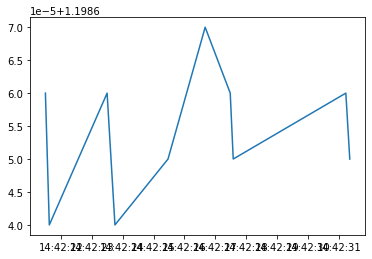

In [30]:
plt.plot(df['timestamp'], df['bid'])

In [11]:
df_ticks.reset_index(inplace=True)

In [18]:
df_ticks = df_ticks.columns.drop('index')

In [9]:
df_ticks

,timestamp,bid,time_msc,ask,Symbol,time
0,2021-04-16 14:42:21.498,1.19866,1618584141498,1.19869,EURUSD,1.618584e+09
0,2021-04-16 14:42:21.624,1.19864,1618584141624,1.19867,EURUSD,1.618584e+09
0,2021-04-16 14:42:23.496,1.19866,1618584143496,1.19867,EURUSD,1.618584e+09
0,2021-04-16 14:42:23.750,1.19864,1618584143750,1.19867,EURUSD,1.618584e+09
0,2021-04-16 14:42:25.469,1.19865,1618584145469,1.19867,EURUSD,1.618584e+09
0,2021-04-16 14:42:26.672,1.19867,1618584146672,1.19869,EURUSD,1.618584e+09
0,2021-04-16 14:42:27.484,1.19866,1618584147484,1.19868,EURUSD,1.618584e+09
0,2021-04-16 14:42:27.581,1.19865,1618584147581,1.19867,EURUSD,1.618584e+09
0,2021-04-16 14:42:31.228,1.19866,1618584151228,1.19869,EURUSD,1.618584e+09
0,2021-04-16 14:42:31.356,1.19865,1618584151356,1.19868,EURUSD,1.618584e+09


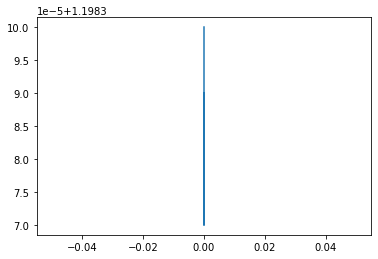

In [8]:
plt.plot(df_ticks[['time','bid']])

In [24]:
message

{'tick': {'bid': 1.1983,
  'time_msc': 1618578914369,
  'ask': 1.19833,
  'Symbol': 'EURUSD',
  'time': 1618578914.0}}

In [25]:
type(message)

dict

In [28]:
message['tick']

{'bid': 1.1983,
 'time_msc': 1618578914369,
 'ask': 1.19833,
 'Symbol': 'EURUSD',
 'time': 1618578914.0}

In [30]:
import pandas as pd

In [31]:
pd.to_datetime(message['tick']['time_msc'], unit='ms')

Timestamp('2021-04-16 13:15:14.369000')

In [88]:
df_ticks = df_ticks.append(pd.DataFrame.from_records([message['tick']]))
df_ticks

,bid,time_msc,ask,Symbol,time,date,timestamp
0,1.1983,1618578914369,1.19833,EURUSD,1.618579e+09,2021-04-16 13:15:14.369,2021-04-16 13:15:14.369
0,1.1983,1618578914369,1.19833,EURUSD,1.618579e+09,2021-04-16 13:15:14.369,2021-04-16 13:15:14.369


In [60]:
pd.DataFrame( columns=list(message['tick'].keys()))

,bid,time_msc,ask,Symbol,time


In [67]:
df_ticks

,bid,time_msc,ask,Symbol,time


In [80]:
message['tick']['timestamp'] = pd.to_datetime(message['tick']['time_msc'], unit='ms')
message['tick']

{'bid': 1.1983,
 'time_msc': 1618578914369,
 'ask': 1.19833,
 'Symbol': 'EURUSD',
 'time': 1618578914.0,
 'date': Timestamp('2021-04-16 13:15:14.369000'),
 'timestamp': Timestamp('2021-04-16 13:15:14.369000')}

In [76]:
df_ticks.append((message['tick']), ignore_index=True)


,bid,time_msc,ask,Symbol,time
0,1.1983,1618578914369,1.19833,EURUSD,1.618579e+09
